# Data Exploration

The purpose of this notebook is to explore the dataset.

The dataset can be found under this URL: https://snap.stanford.edu/data/email-EuAll.html
Severel statistics can be looked up there as well. 

On a general level, the dataset represents emails sent. The dataset is already anonymized and each person has a unique id (integer, starting at 0).
The graph itself is directed.

But first let's get the imports out of the way.

In [1]:
# correct working directory.
# This is necessary for imports because the notebook is not in the main folder of the project. 
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

# library imports
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True 
import igraph as ig

# same-project dependencies.
from data.dataset import Dataset

c:\Users\frank\Documents\Teaching\LU\Planning and Optimization LU - Material\Planning Example Project\planning_example_project\environment\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\frank\Documents\Teaching\LU\Planning and Optimization LU - Material\Planning Example Project\planning_example_project


## Download and Inspect Data

As a first step we download our data. The class *Dataset* manages this for us. It takes care of downloading and managing the files of the dataset in the background. The first time we execute the following cell, it will take a bit longer, as the data will be downloaded. 

In [2]:
# Dataset wrapper automatically downloads data the first time we request it.
dataset = Dataset()
graph = dataset.load_graph()

Let's first look at some general statistics: the number of nodes and edges.

In [3]:
print("Nr nodes: ", graph.num_nodes)
print("Nr edges: ", graph.num_edges)

Nr nodes:  265214
Nr edges:  420045


## Branching Factor

From the cell above we can see that there are about 265.000 persons, sending 420.000 emails.
This means on average each person sends emails to two other persons.

This means on average, we would expect the graph representation to have a branching factor of 2. For making decisions about algorithms, it would be interesting to understand how consistent this branching factor is. For this purpose, we will plot the distribution of number of emails sent.
Note that the below plot is on a logarithmic scale.

Maximum outgoing edges:  930
Most frequent number of edges:  1
----------------------
Nr nodes with 0 edges:  39805
Nr nodes with 1 edge:  192117
Nr nodes with 2 edges:  18763
Nr nodes with 3 edges:  5461
Nr nodes with 4 edges:  2537
Nr nodes with 5 edges:  1489
Nr nodes with 6 edges:  896
Nr nodes with 7 edges:  634
Nr nodes with 8 edges:  445
Nr nodes with 9 edges:  355
Nr nodes with 10 edges:  277


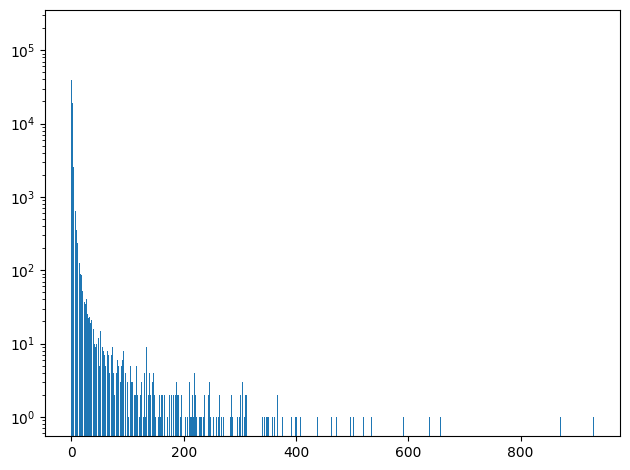

In [4]:

counts = []

for index in range(len(graph.adjacency_list)):
    edges = graph.adjacency_list[index]
    nr_nodes = len(edges)
    while len(counts)<=nr_nodes:
        counts.append(0)
    counts[nr_nodes] += 1

print("Maximum outgoing edges: ",len(counts)-1)
print("Most frequent number of edges: ", counts.index(max(counts)))
print("----------------------")
print("Nr nodes with 0 edges: ", counts[0])
print("Nr nodes with 1 edge: ", counts[1])
print("Nr nodes with 2 edges: ", counts[2])
print("Nr nodes with 3 edges: ", counts[3])
print("Nr nodes with 4 edges: ", counts[4])
print("Nr nodes with 5 edges: ", counts[5])
print("Nr nodes with 6 edges: ", counts[6])
print("Nr nodes with 7 edges: ", counts[7])
print("Nr nodes with 8 edges: ", counts[8])
print("Nr nodes with 9 edges: ", counts[9])
print("Nr nodes with 10 edges: ", counts[10])
plt.bar(range(len(counts)),counts, log=True)
plt.show()


As can be seen in the plot, the distribution is very skewed. The majority of nodes has one outgoing edge. Higher numbers of edges exist but are a lot less frequent. Overall, the majority of nodes has between 0 and 100 outgoing edges. A low branching factor of around 2 should thus still be realistic.

# Do edges represent individual emails?

One thing that that wasn't clear from the description of the dataset was whether edges represent individual emails or just the fact that at least one email has been sent.
To check this, we can chek whether there are any dublicate entries of edges between the same source and target. If so, we would expect that edges represent individual emails.

In [5]:
contains_dublicates = False
for index in range(len(graph.adjacency_list)):

    if nr_nodes != len(set(edges)):
        contains_dublicates = True
print("Dataset contains edges with dublicate source and targets: ",contains_dublicates)

Dataset contains edges with dublicate source and targets:  False


It seems like there is no single case of a dublicate edge. While this is no conclusive proof, it is very unlikely that not a single case of two emails with the same sender and receiver exist. For this reason, we will assume that connections in this dataset represent contact, not individual emails. 

## Visualization

The below cell is mostly for you to play around with visualization. Since the graph we deal with is huge, it isn't easy to visualize efficiently. You can pick out a few nodes to visualize here, but it'll be very limited. If you want to really visualize this, you probably will have to go to dedicated programs.

Generally, what a visualization does is, it assigns coordinates to each node to minimize overlap while visualizing.


Nr edges:  420045


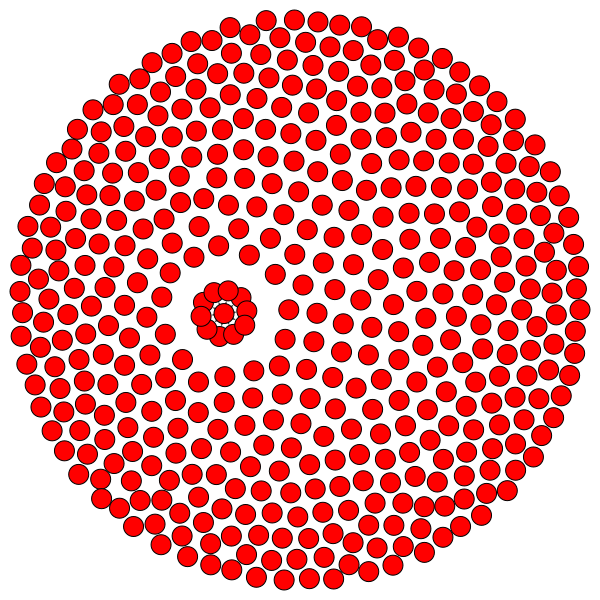

In [19]:
edges = graph.get_edge_tuples()
print("Nr edges: ", len(edges))
g = ig.Graph(edges=edges[:10], directed = True);
layout = g.layout(layout='auto')
ig.plot(g, layout = layout)